# OpenCV를 이용한 이미지 전처리

## OpenCV for Python 설치

```
conda install -c menpo opencv
```

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Homogenous Coordinate

homogenous coordinate는 2차원상의 점의 위치를 2차원 벡터가 아닌 3차원 벡터로 표현하는 방법이다.

다음과 같이 마지막 원소로 1을 augment하여 만든다.

$$ \mathbf{x} = \begin{pmatrix} x \\ y \\ 1 \end{pmatrix} $$

마지막 원소가 1이 아닌 경우에는 1로 스케일링 시킨 것과 동일한 위치를 가리킨다.

$$ \begin{pmatrix} x \\ y \\ w \end{pmatrix} = \begin{pmatrix} x/w \\ y/w \\ 1 \end{pmatrix} $$

homogenous coordinate를 사용하면 회전 변환과 이동을 하나의 행렬 곱으로 나타낼 수 있기 때문에 수식 및 연산이 간단해진다.

$$ \begin{pmatrix}x' \\ y'\end{pmatrix} = \mathbf{A}\begin{pmatrix}x \\ y\end{pmatrix} + \mathbf{t}  $$

$$ \mathbf{x'} = \begin{pmatrix} \mathbf{A} & \mathbf{t} \\ \mathbf{0} &  1\end{pmatrix}\mathbf{x} $$

이렇게 하나의 $4 \times 4$ 행렬로 2차원 좌표 변환을 할 때, 이 $4\times 4$ 행렬을 homography matrix 라고 부른다.


$$ \mathbf{x'} = \mathbf{H} \mathbf{x} $$

## Image Transform

### Rigid Transform

rigid transform 은 회전($\theta$), 이동($\mathbf{t}=(t_x, t_y)$), 두가지 요소만 사용하여 이미지를 변환한다.

$$ \mathbf{H} = \begin{pmatrix} \cos\theta & -\sin\theta & t_x \\ \sin\theta & \cos\theta & t_y \\ 0 & 0 & 1 \end{pmatrix} $$

### Similarity Transform

similarity transform 은 확대/축소(s), 회전($\theta$), 이동($\mathbf{t}=(t_x, t_y)$), 세가지 요소만 사용하여 이미지를 변환한다.


$$ \mathbf{H} = \begin{pmatrix} s\cos\theta & -s\sin\theta & t_x \\ s\sin\theta & s\cos\theta & t_y \\ 0 & 0 & 1 \end{pmatrix} $$

### Affine Transform

affine transform 은 homogenous coordinate의 선형 변환(행렬 곱)만 이용하여 이미지를 변환한다. 서로 수직이 아닌 좌표축도 이용할 수 있기 때문에 확대/축소, 회전, 이동 이외에도 각도 변환(대칭 찌그러짐)도 가능하다. 

affine transform을 지정하는데는 3 점만 있으면 된다.

OpenCV에는 주어진 두 쌍의 3점으로부터 affine transform 을 위한 homography matrix를 계산하는 ``getAffineMatrix`` 함수와 실제로  affine transform 을 수행하는 ``warpAffine`` 함수가 있다.

In [2]:
%cd ~/data
!wget https://raw.githubusercontent.com/opencv/opencv/8f96b15e2a47e4a4a12b5c7c98c8860dd4146166/samples/data/sudoku.png --no-check-certificate

[WinError 2] 지정된 파일을 찾을 수 없습니다: 'C:\\Users\\saint/data'
C:\Users\saint\Documents\Automation Anywhere Files\DT_COE_COE1\Python_RPA_Study\CaptchaBreaking-with-DeepLearning


--19:50:35--  https://raw.githubusercontent.com/opencv/opencv/8f96b15e2a47e4a4a12b5c7c98c8860dd4146166/samples/data/sudoku.png
           => `sudoku.png.2'
Resolving raw.githubusercontent.com... 151.101.228.133
Connecting to raw.githubusercontent.com|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250,720 (245K) [image/png]

    0K .......... .......... .......... .......... .......... 20%  442.58 KB/s
   50K .......... .......... .......... .......... .......... 40%  581.18 KB/s
  100K .......... .......... .......... .......... .......... 61%  579.31 KB/s
  150K .......... .......... .......... .......... .......... 81%  597.11 KB/s
  200K .......... .......... .......... .......... ....      100%  655.31 KB/s

19:50:36 (559.66 KB/s) - `sudoku.png.2' saved [250720/250720]



In [3]:
img = cv2.imread('sudoku.png').astype(np.float32) / 255.0
rows, cols, ch = img.shape

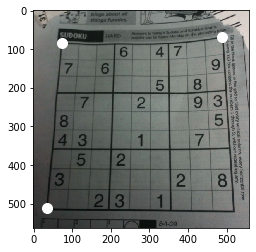

In [4]:
pts1 = np.float32([[73, 85], [488, 68], [36, 511]])
pts2 = np.float32([[20, 20], [320, 20], [20, 320]])
pts_x, pts_y = zip(*pts1)
plt.imshow(img, cmap=plt.cm.bone)
plt.scatter(pts_x, pts_y, c='w', s=100)
plt.show()

In [5]:
H = cv2.getAffineTransform(pts1, pts2)
H

array([[ 7.25472721e-01,  6.30105415e-02, -3.83154047e+01],
       [ 2.89507893e-02,  7.06739857e-01, -4.21862955e+01]])

In [6]:
img2 = cv2.warpAffine(img, H, (cols, rows))

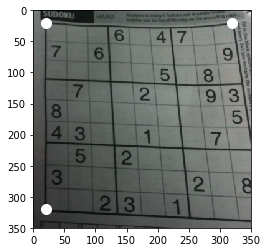

In [7]:
x_pts, y_pts = zip(*pts2)
plt.imshow(img2, cmap=plt.cm.bone)
plt.scatter(x_pts, y_pts, c='w', s=100)
plt.xlim(0, 350)
plt.ylim(350, 0)
plt.show()

### Perspective Transform

perspective transform 은 pin-hole camera 모형을 사용하여 2차원 이미지를 변환하는 방법이다.

affine transform을 지정하는데는 4 점만 있으면 된다.

<img src="https://i.stack.imgur.com/M1LOy.png">

OpenCV에는 주어진 두 쌍의 4점으로부터 perspective transform 을 위한 homography matrix를 계산하는 ``getPerspectiveTransform`` 함수와 실제로  affine transform 을 수행하는 ``warpPerspective`` 함수가 있다.

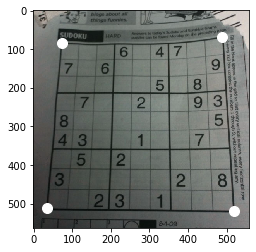

In [8]:
pts1 = np.float32([[73, 85], [488, 68], [36, 511], [518, 518]])
pts2 = np.float32([[20, 20], [320, 20], [20, 320], [320, 320]])
pts_x, pts_y = zip(*pts1)
plt.imshow(img, cmap=plt.cm.bone)
plt.scatter(pts_x, pts_y, c='w', s=100)
plt.show()

In [9]:
H = cv2.getPerspectiveTransform(pts1, pts2)
H

array([[ 8.02100032e-01,  7.73765300e-02, -4.42301024e+01],
       [ 3.80541264e-02,  8.62596918e-01, -5.51984843e+01],
       [ 1.52276051e-04,  3.98754093e-04,  1.00000000e+00]])

In [10]:
img2 = cv2.warpPerspective(img, H, (cols, rows))

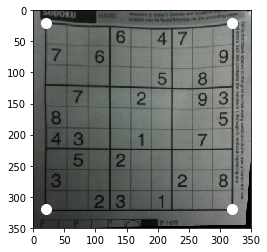

In [11]:
x_pts, y_pts = zip(*pts2)
plt.imshow(img2, cmap=plt.cm.bone)
plt.scatter(x_pts, y_pts, c='w', s=100)
plt.xlim(0, 350)
plt.ylim(350, 0)
plt.show()

## Feature Detection

이미지에 있는 코너, 라인, 특징점, 얼굴 등의 feature point의 위치와 특성을 검출

### Corner Detection

corner point 는 이미지의 명도의 차이 즉 intensity의 변화가 모든 방향으로 큰 점을 말한다.

OpenCV는 코너를 검출하기 위한 다음 세 가지 알고리즘과 명령을 제공한다.

* ``cornerHarris``: Harris Corner Detector
* ``goodFeaturesToTrack``: Shi-Tomasi Corner Detector

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
dst = cv2.cornerHarris(gray, 9, 3, 0.01)
dst = cv2.dilate(dst, None)
ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)
dst = np.uint8(dst)

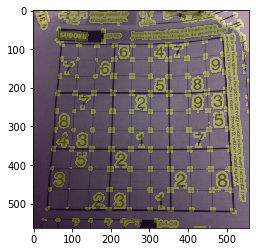

In [14]:
plt.imshow(img)
plt.imshow(dst, alpha=0.25)
plt.show()

In [15]:
corners = cv2.goodFeaturesToTrack(gray, 500, 0.001, 40)
corners = np.int0(corners)

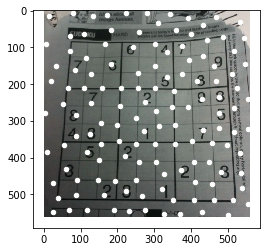

In [16]:
plt.imshow(img)
plt.scatter(corners[:, 0, 0], corners[:, 0, 1], s=20, c="w")
plt.show()

### Edge Detection

Edge Detection는 단순히 명암이 크게 바뀌는 부분 즉, 인텐서티가 큰 포인트를 검출하는 것이다.

* ``Canny``: Canny Edge Detector

In [17]:
edges = cv2.Canny(np.uint8(img * 255), 50, 100)

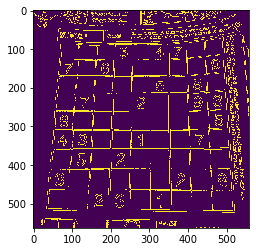

In [18]:
plt.imshow(edges)
plt.show()

### Line Detection

line detection은 검출된 edge로부터 직선을 이루는 부분을 찾아낸다.

In [19]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180.0, 100, 400, 10)

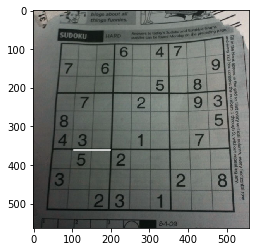

In [20]:
plt.imshow(img)
for x1, y1, x2, y2 in lines[0]:
    plt.plot([x1, x2], [y1, y2], c='w')
plt.show()

### SIFT

SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다.

또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.

In [21]:
sift = cv2.xfeatures2d.SIFT_create()

In [22]:
kps, des = sift.detectAndCompute(np.uint8(img * 255), None)

In [23]:
kp0 = kps[0]
print("pt=({},{}), size={}, angle={}".format(kp0.pt[0], kp0.pt[0], kp0.size, kp0.angle))

pt=(86.5121841430664,86.5121841430664), size=2.2168092727661133, angle=245.7929229736328


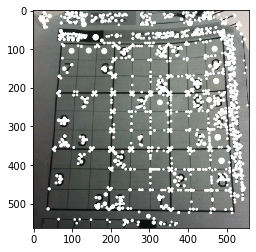

In [24]:
pts_x = [kp.pt[0] for kp in kps]
pts_y = [kp.pt[1] for kp in kps]
pts_s = [kp.size for kp in kps]

plt.imshow(img)
plt.scatter(pts_x, pts_y, s=pts_s, c="w")
plt.show()

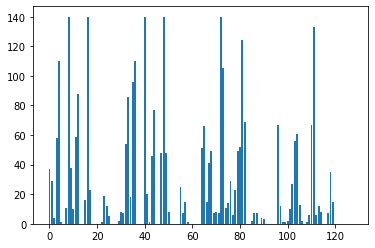

In [25]:
plt.bar(np.arange(len(des[0])), des[0])
plt.show()

### SURF

SURF(Speeded-Up Robust Features)는 인텐서티 계산 방법을 간략화 하는 등의 방법으로 SIFT 방법의 속도와 안정성을 개선한 것이다. 

In [26]:
surf = cv2.xfeatures2d.SURF_create(400)

In [27]:
kps, des = surf.detectAndCompute(np.uint8(img * 255), None)

In [28]:
kp0 = kps[0]
print("pt=({},{}), size={}, angle={}".format(kp0.pt[0], kp0.pt[0], kp0.size, kp0.angle))

pt=(489.1451721191406,489.1451721191406), size=21.0, angle=355.9819030761719


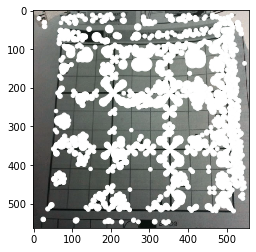

In [29]:
pts_x = [kp.pt[0] for kp in kps]
pts_y = [kp.pt[1] for kp in kps]
pts_s = [kp.size for kp in kps]

plt.imshow(img)
plt.scatter(pts_x, pts_y, s=pts_s, c="w")
plt.show()

### Eye Detection

* Haar-window based Cascade Ada-Boosting

  * Paul Viola, Michael J. Jones. Rapid Object Detection using a Boosted Cascade of Simple Features. Conference on Computer Vision and Pattern Recognition (CVPR), 2001, pp. 511-518.

In [30]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--19:51:44--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
           => `haarcascade_eye.xml'
Resolving raw.githubusercontent.com... 151.101.228.133
Connecting to raw.githubusercontent.com|151.101.228.133|:443... connected.
ERROR: Certificate verification error for raw.githubusercontent.com: unable to get local issuer certificate
ERROR: certificate common name `www.github.com' doesn't match requested host name `raw.githubusercontent.com'.
To connect to raw.githubusercontent.com insecurely, use `--no-check-certificate'.
Unable to establish SSL connection.


In [31]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [32]:
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()
img = np.uint8(data.images[0] * 255)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\saint\scikit_learn_data


In [33]:
eyes = eye_cascade.detectMultiScale(img, 1.3, 5)
eyes

error: C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1698: error: (-215) !empty() in function cv::CascadeClassifier::detectMultiScale


In [ ]:
import matplotlib.patches as patches

fig, ax = plt.subplots()
plt.imshow(img, cmap=plt.cm.bone)
plt.grid(False)
ax.add_patch(patches.Rectangle((eyes[0][0], eyes[0][1]), eyes[0][2], eyes[0][3], fill=False))
ax.add_patch(patches.Rectangle((eyes[1][0], eyes[1][1]), eyes[1][2], eyes[1][3], fill=False))
plt.show()